<a href="https://colab.research.google.com/github/shecheeyee/PyTorch_learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification

Classification - problem of predicting whtere something is one thing or another 

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

#create circle
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42) #random seed

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"first 5 sample of X:\n {X[:5]}")
print(f"first 5 sample of y:\n {y[:5]}")

first 5 sample of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 sample of y:
 [1 1 1 1 0]


In [5]:
#df of circles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


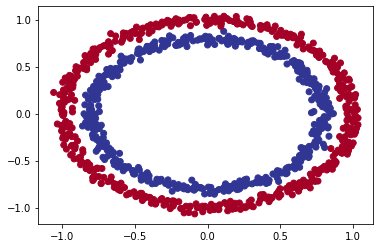

In [6]:
#visualization
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], 
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shape

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

##### we are working w numpy now, we would want to turn it into tensors

In [9]:
# View first examples of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} ad the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] ad the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'1.13.1+cu116'

In [11]:
type(X)

numpy.ndarray

In [12]:
#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [14]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [15]:
# split into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,  #train 80%, test 20%
                                                    random_state=42)

In [16]:
len(X_train), len(X_test)

(800, 200)

##2. Building a model

Build a model to classify blue and red dots

steps:
1. Set up device agnostic code so we can run on GPU (if avail)
2. Construct a model by subclassing nn.module
3. Define a loss fn and optimizer
4. Create a training and testing loop

In [17]:
# agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Create a model:

1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of the data
3. Define a `forward()` method that outlines the forward pass of the model 
4. Instantiate an instance of the model class and send to target device

In [18]:
#1. Construct model that subclassess `nn.Module`
import torch
from torch import nn

class CircleModelV0(nn.Module):

  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of the data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)  #more hidden features, more opportunity for the model to learn patterns
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    '''
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
        )
    '''

  #3. define a forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2
    #return self.two_linear_layers(x)
    
#4. Instantiate an instance of our model calss and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cuda'

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
# replicate the model using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.4527,  0.5100],
                      [-0.1339,  0.1742],
                      [ 0.7058, -0.5032],
                      [-0.7070,  0.7069],
                      [-0.6030, -0.5516]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0585,  0.5431, -0.4512,  0.6490,  0.5269], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3900,  0.4364, -0.3852, -0.2620, -0.1905]], device='cuda:0')),
             ('1.bias', tensor([-0.4254], device='cuda:0'))])

In [23]:
# predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labesl:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[ 0.0351],
        [ 0.0621],
        [-0.2848],
        [ 0.1268],
        [-0.6801],
        [-0.6605],
        [-0.2711],
        [-0.4413],
        [-0.2676],
        [ 0.0596]], device='cuda:0')

First 10 labesl:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Loss fn and optimizer

Picking loss fn and optimizer

Loss fn:
Regression: MAE (mean absolute error), MSE (mean squared error)
Classification: Binary cross entropy or categorical cross entropy 

Optimizer:
Common ones are SGD and Adam



* For now, we will be using `torch.nn.BCEWtihLogitsLoss()` for the loss function

In [24]:
# setup loss fn
# loss_fn = torch.nn.BCELoss() requires inputs to have gone through the sigmoid prior
loss_fn = torch.nn.BCEWithLogitsLoss() #sigmoid activations function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
# calculate accuracy 
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct / len(y_pred) * 100
  return acc

##3. Train model

steps:
1. Forward pass
2. Calc loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer (grad descent)

### 3.1 Raw logits -> prediction probabilities -> prediction labels

model outputs will be raw **logits**

Convert these **logits** into prediction probabilities by passing them to some kind of activation function (eg sigmoid for binary classification and softmax for multiclass classification)

Convert the model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax()

In [26]:
#view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0351],
        [ 0.0621],
        [-0.2848],
        [ 0.1268],
        [-0.6801]], device='cuda:0')

In [27]:
# Use the sigmoid activation functino on the model logits to turn them into predictions probabilities
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs

tensor([[0.5088],
        [0.5155],
        [0.4293],
        [0.5317],
        [0.3362]], device='cuda:0')

For prediction probability values, a range-style round is needed to be performed.

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [28]:
# Find predicted labels, raw logits -> pred prob -> labels
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 0.], device='cuda:0')

### 3.2 Building a training and testing loop


In [29]:

# no. of eopchs
epochs = 100

# Data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calc the loss/acc
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss requires raw logis as inputs
                 y_train)
  acc = accuracy_fn(y_true=y_train, 
                    y_pred=y_pred)
  
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backpropagation)
  loss.backward()

  #5. Optimizer step (graditent descent)
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
  #1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calc test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)
    
    #print out the situation
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71363, Acc: 46.25% | Test Loss: 0.71683, Test Acc: 41.50%
Epoch: 10 | Loss: 0.70399, Acc: 48.38% | Test Loss: 0.70791, Test Acc: 47.00%
Epoch: 20 | Loss: 0.69960, Acc: 48.62% | Test Loss: 0.70346, Test Acc: 50.50%
Epoch: 30 | Loss: 0.69716, Acc: 48.62% | Test Loss: 0.70075, Test Acc: 50.50%
Epoch: 40 | Loss: 0.69567, Acc: 48.62% | Test Loss: 0.69896, Test Acc: 50.50%
Epoch: 50 | Loss: 0.69472, Acc: 48.38% | Test Loss: 0.69772, Test Acc: 49.50%
Epoch: 60 | Loss: 0.69411, Acc: 49.00% | Test Loss: 0.69685, Test Acc: 49.00%
Epoch: 70 | Loss: 0.69371, Acc: 49.38% | Test Loss: 0.69624, Test Acc: 50.50%
Epoch: 80 | Loss: 0.69346, Acc: 49.50% | Test Loss: 0.69580, Test Acc: 48.50%
Epoch: 90 | Loss: 0.69329, Acc: 49.88% | Test Loss: 0.69548, Test Acc: 48.00%


## 4. Make predictions and evaluate the model

From the metrics, the model is not performing well (as good as guessing)

Make predictions and visualize them

In [30]:
import requests
from pathlib import Path

# download helper functions from a github repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


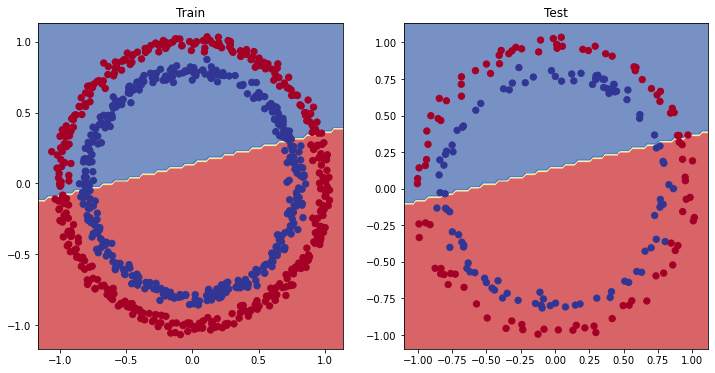

In [31]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

The model is done using linear lines, which cannot conform to a circular data.
Cutting through the data with a straight line is as good as guessing as the data is circular

## 5. Improving a model 

* Add more layers - give the model more chances to learn about the patterns in the data
* Add more hidden units - eg 5 hidden to 50 hidden
* Fit for longer, more epochs
* Changing the activation function (sigmoid at the moment, pretty standard)
* Change learning rate (the amt optimizer adjusts)
* Change loss function (BCE, pretty standard)

These options are from a model's perspective becuase they deal directly with the model, rather than the data.

Because these options are all values, it can be changed (**hyperparameters**)

Try and improve model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    #z = self.layer_1(x)  #logits is represented by z
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
model_1.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.4353, -0.5194],
                      [-0.6196, -0.4474],
                      [ 0.2060,  0.1788],
                      [ 0.1184, -0.3212],
                      [ 0.2688, -0.0300],
                      [-0.3882, -0.5691],
                      [-0.6318, -0.0269],
                      [ 0.2241,  0.6309],
                      [-0.0968,  0.3786],
                      [ 0.2403,  0.4206]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4867, -0.3632, -0.4437,  0.2502,  0.4258, -0.3310, -0.6066, -0.4276,
                      -0.2244, -0.5853], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.1554, -0.0368,  0.1776,  0.1032, -0.2364,  0.2328, -0.1898, -0.1708,
                        0.0312, -0.3130],
                      [ 0.2849,  0.0699,  0.0250, -0.2854, -0.3146,  0.2360, -0.2670,  0.0406,
                       -0.2949, -0.2984],
                      [-0.1975,  0.1695,  0.2461,  0

In [34]:
#Create loss function
loss_fn = nn.BCEWithLogitsLoss()
#Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [35]:
#training loop and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)  

#train longer
epochs = 1000

#put data to target device
X_train, y_train  = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  #training
  model_1.train()
  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred =torch.round(torch.sigmoid(y_logits)) #logits -> pred-prob -> predictions

  #2. Calc loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  #3. Optimizer zero grad
  optimizer.zero_grad

  #4. Loss backward, backpropagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    #2. calc loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  #print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")
    
                   

Epoch: 0 | Loss:0.71452, Acc:50.00% | Test Loss:0.71519, Test Acc:47.00%
Epoch: 100 | Loss:0.69905, Acc:50.00% | Test Loss:0.69919, Test Acc:47.00%
Epoch: 200 | Loss:0.69446, Acc:50.00% | Test Loss:0.69327, Test Acc:47.00%
Epoch: 300 | Loss:0.69932, Acc:50.00% | Test Loss:0.70183, Test Acc:47.00%
Epoch: 400 | Loss:0.69502, Acc:50.25% | Test Loss:0.69593, Test Acc:47.00%
Epoch: 500 | Loss:0.69843, Acc:49.75% | Test Loss:0.70593, Test Acc:47.00%
Epoch: 600 | Loss:0.70146, Acc:50.00% | Test Loss:0.71836, Test Acc:47.00%
Epoch: 700 | Loss:0.70157, Acc:51.38% | Test Loss:0.69344, Test Acc:47.00%
Epoch: 800 | Loss:0.70886, Acc:53.50% | Test Loss:0.74243, Test Acc:47.00%
Epoch: 900 | Loss:0.70809, Acc:50.00% | Test Loss:0.72349, Test Acc:47.00%


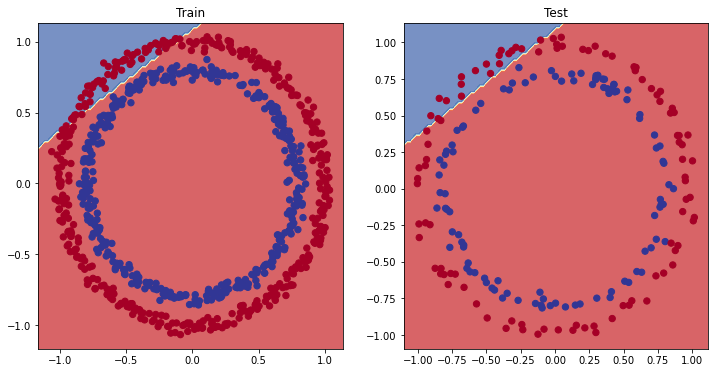

In [36]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line data

Troubleshoot by testing straight line data, find out if the model is the problem or not

In [37]:
#create data
weight = 0.7
bias = 0.3
start, end, step = 0, 1, 0.01

#create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [38]:
# create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

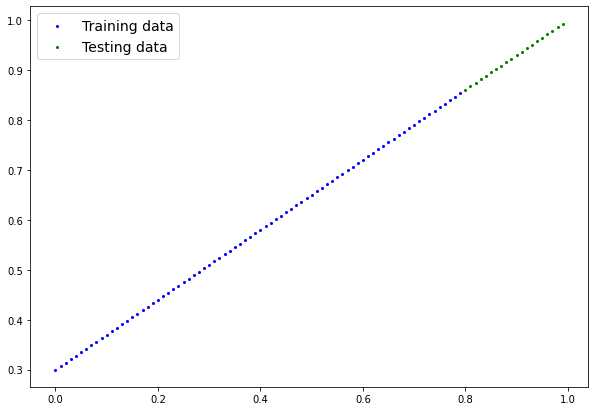

In [39]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line


In [40]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  y_pred = model_2(X_train_regression) 
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}  | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986  | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858  | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533  | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137  | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964  | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940  | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903  | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878  | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840  | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798  | Test Loss: 0.00360


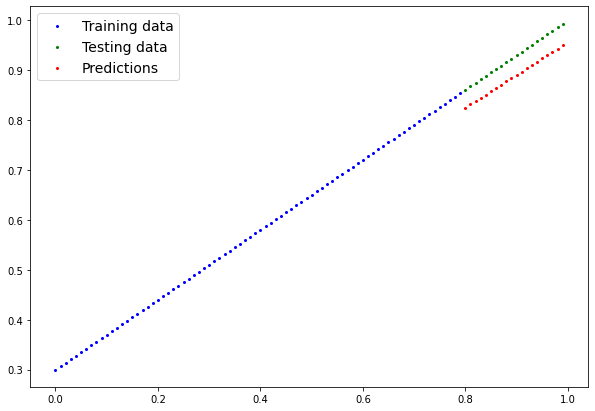

In [43]:
#turn on eval mode
model_2.eval()

#make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. Non-linearity

Pattens that can be achieved with infinite amount of straight and non-straight line

In ML, an infinite amount of linear and non-linear function

### 6.1 Recreating non-linear data (red and blue circles)

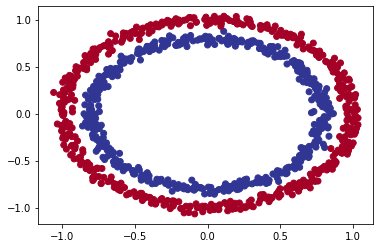

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [45]:
#convert data to tensors then to traintest split
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

### 6.2 Model with non-linearity

In [46]:
# building model with non-linear activation fn
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=64)
    self.layer_2 = nn.Linear(in_features=64, out_features=64)
    self.layer_3 = nn.Linear(in_features=64, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    #where to put non-linear activation fn (relu)?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
#Create loss function
loss_fn = nn.BCEWithLogitsLoss()
#Create optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)

In [48]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  y_pred = model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)  #BCEwlogits takes in logits
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}%| Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69179, Acc: 47.38%| Test Loss: 0.69427, Test Acc: 46.50%
Epoch: 100 | Loss: 0.67966, Acc: 63.50%| Test Loss: 0.68497, Test Acc: 56.00%
Epoch: 200 | Loss: 0.66168, Acc: 78.00%| Test Loss: 0.67067, Test Acc: 71.00%
Epoch: 300 | Loss: 0.62306, Acc: 90.88%| Test Loss: 0.63723, Test Acc: 89.50%
Epoch: 400 | Loss: 0.53367, Acc: 99.00%| Test Loss: 0.55896, Test Acc: 98.00%
Epoch: 500 | Loss: 0.37491, Acc: 99.75%| Test Loss: 0.41442, Test Acc: 98.50%
Epoch: 600 | Loss: 0.21174, Acc: 100.00%| Test Loss: 0.25405, Test Acc: 99.50%
Epoch: 700 | Loss: 0.12633, Acc: 100.00%| Test Loss: 0.16374, Test Acc: 100.00%
Epoch: 800 | Loss: 0.07601, Acc: 100.00%| Test Loss: 0.10677, Test Acc: 100.00%
Epoch: 900 | Loss: 0.05125, Acc: 100.00%| Test Loss: 0.07769, Test Acc: 100.00%


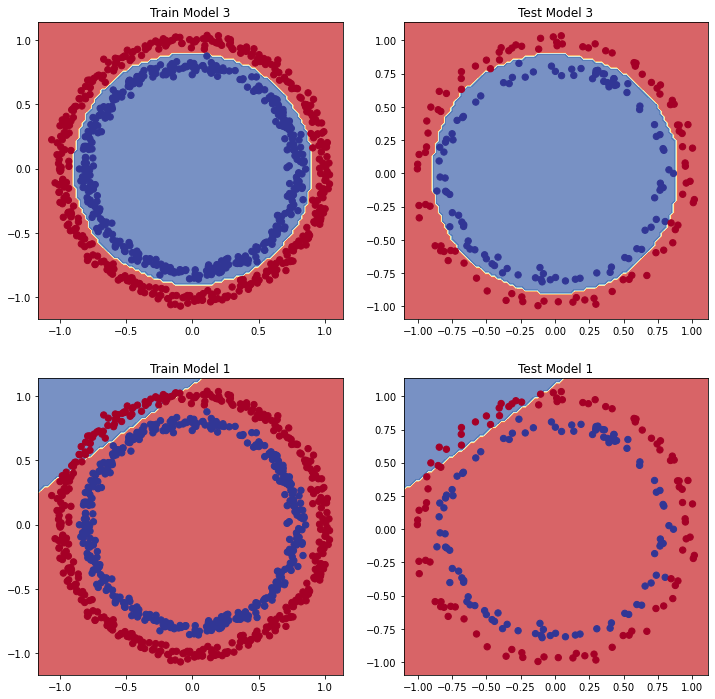

In [49]:
# plot decision boundary of the model
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("Train Model 3")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(2, 2, 2)
plt.title("Test Model 3")
plot_decision_boundary(model_3, X_test, y_test)
plt.subplot(2, 2, 3)
plt.title("Train Model 1")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(2, 2, 4)
plt.title("Test Model 1")
plot_decision_boundary(model_1, X_test, y_test)

## 7. Replicating non-linear activation functions


In [50]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

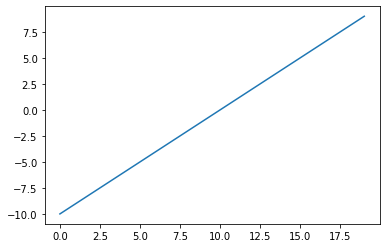

In [51]:
plt.plot(A)

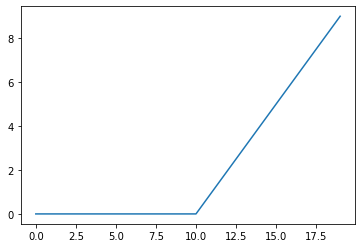

In [52]:
plt.plot(torch.relu(A))

In [53]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) #inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

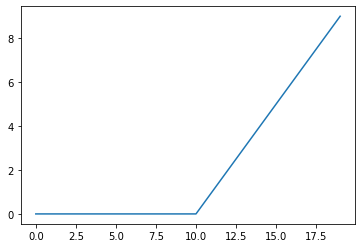

In [54]:
#plot ReLU activatino function
plt.plot(relu(A))

In [55]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

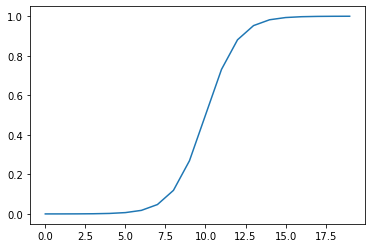

In [56]:
plt.plot(torch.sigmoid(A))


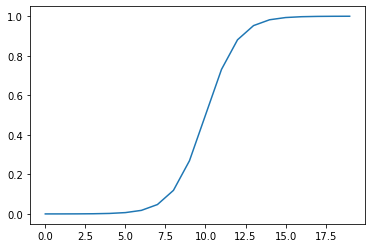

In [57]:
plt.plot(sigmoid(A))

## 8. Multi-class classificatoin problem

* Binary classifcication = one or another
* Multi-class = more than one thing or another

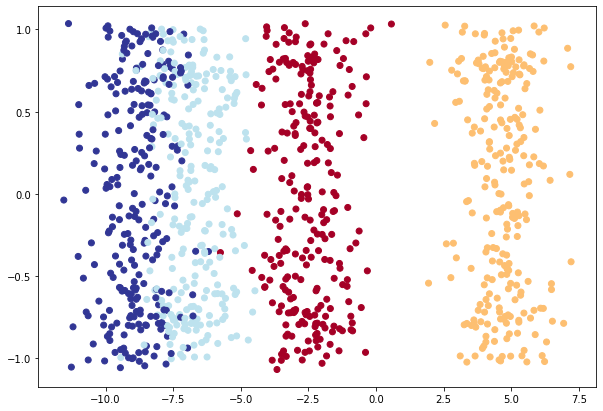

In [58]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#hyperparams
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob,y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.0,
                           random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#. Train test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


### 8.2 Building a multi-class classification model

In [59]:
#device agnositc code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [60]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Intializes multi-class classification
    
    Args:
      input features (int): Number of input features to the model
      output features (int): Number of outputs features (output classes)
      hidden_units (int): Number of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# instance of BlobModel and send to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)


model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 8.3 Create a loss fn and an optimizer for multi-class model

In [61]:
# loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                         lr=0.1)

## 8.4 Getting prediction probabilities fro a multi_class model

To evaluate, train and test the model, need to convert model's output (logits) to prediction probabilities, then to prediction labels

Forward pass turns data into logits, using `torch.softmax()` we can turn it into prediction-probabilities.

Predicition probabilities shows the probability of each tensor belonging in either one of the classes. Using `torch.argmax()` we can find the highest probability, and output the index (class) that has the highest probability.

In [62]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7189, -0.6782, -1.4654, -1.0904],
        [-0.1043, -0.9593, -0.6114, -0.1405],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4796, -0.5497, -1.0410, -0.7695],
        [-0.2697, -1.2876, -1.0842, -0.3385],
        [-0.1383, -1.0363, -0.6852, -0.1579],
        [ 0.2214, -0.2573,  0.1889,  0.0081],
        [-0.2149, -1.1788, -0.9279, -0.2732],
        [ 0.2511, -0.2391,  0.1835, -0.0032],
        [-0.2244, -1.1972, -0.9561, -0.2856]], device='cuda:0')

In [63]:
# convert logits to pred-probs, shows the probability of each tensor belonging to which label
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

tensor([[0.3120, 0.3249, 0.1479, 0.2152],
        [0.3342, 0.1421, 0.2013, 0.3224],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3076, 0.2868, 0.1754, 0.2302],
        [0.3653, 0.1320, 0.1618, 0.3410],
        [0.3371, 0.1373, 0.1951, 0.3305],
        [0.2945, 0.1825, 0.2851, 0.2379],
        [0.3552, 0.1355, 0.1741, 0.3351],
        [0.3010, 0.1844, 0.2813, 0.2334],
        [0.3572, 0.1350, 0.1718, 0.3360]], device='cuda:0')


In [64]:
# convert model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

## 8.5 Training loop

In [65]:
torch.manual_seed = 42
torch.cuda.manual_seed = 42

epochs = 100

X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                 y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                          y_pred=test_preds)
    
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss:{loss:.4f}, Acc:{acc:.2f}% | Test Loss:{test_loss:.4f}, Test Acc:{test_acc:.2f}%")
  



Epoch: 0 | Loss:1.1523, Acc:38.62% | Test Loss:1.0680, Test Acc:44.50%
Epoch: 10 | Loss:0.6225, Acc:98.75% | Test Loss:0.6393, Test Acc:99.50%
Epoch: 20 | Loss:0.3899, Acc:99.75% | Test Loss:0.3934, Test Acc:100.00%
Epoch: 30 | Loss:0.2060, Acc:99.88% | Test Loss:0.1986, Test Acc:100.00%
Epoch: 40 | Loss:0.0724, Acc:99.88% | Test Loss:0.0667, Test Acc:100.00%
Epoch: 50 | Loss:0.0350, Acc:99.88% | Test Loss:0.0321, Test Acc:100.00%
Epoch: 60 | Loss:0.0229, Acc:99.88% | Test Loss:0.0206, Test Acc:100.00%
Epoch: 70 | Loss:0.0171, Acc:99.88% | Test Loss:0.0150, Test Acc:100.00%
Epoch: 80 | Loss:0.0138, Acc:99.88% | Test Loss:0.0118, Test Acc:100.00%
Epoch: 90 | Loss:0.0115, Acc:99.88% | Test Loss:0.0096, Test Acc:100.00%


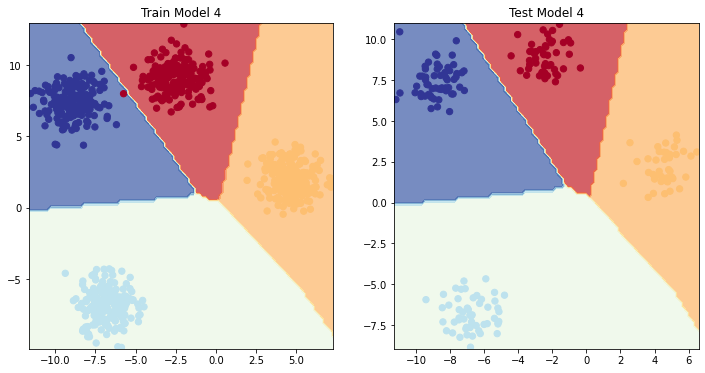

In [67]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train Model 4")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test Model 4")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. Classification metrics

* Accuracy - out of 100 samples, how many does it get right
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

https://towardsdatascience.com/beyond-accuracy-other-classification-metrics-you-should-know-in-machine-learning-ea671be83bb7

PyTorch metrics - https://torchmetrics.readthedocs.io/en/stable/